In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [57]:
df = pd.read_csv("E:Bank Dataset/archive (1)/food_orders_new_delhi (1).csv")
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [59]:
df.shape

(1000, 12)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [61]:
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [62]:
df.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
 12  Delivery_tiem_minutes   1000 non-null   int64    

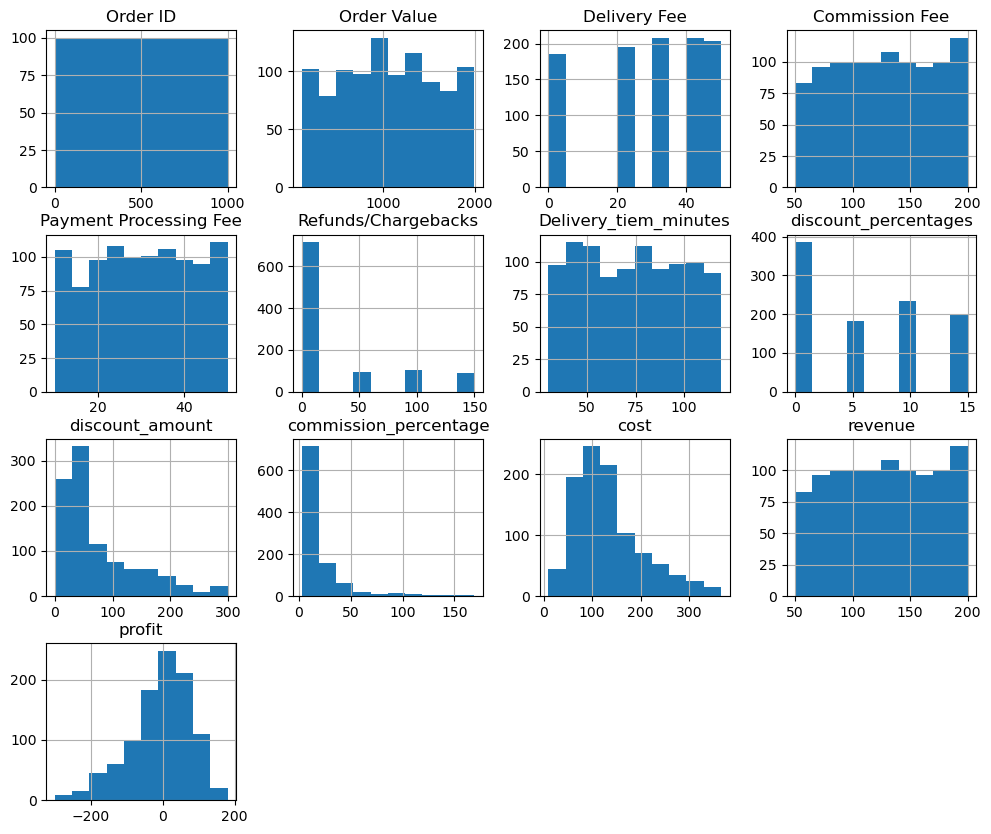

In [92]:
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols].hist(figsize=(12, 10))
plt.show()


C7938    3
C7949    3
C6486    2
C7190    2
C6977    2
        ..
C8509    1
C4854    1
C3491    1
C4124    1
C4335    1
Name: Customer ID, Length: 947, dtype: int64


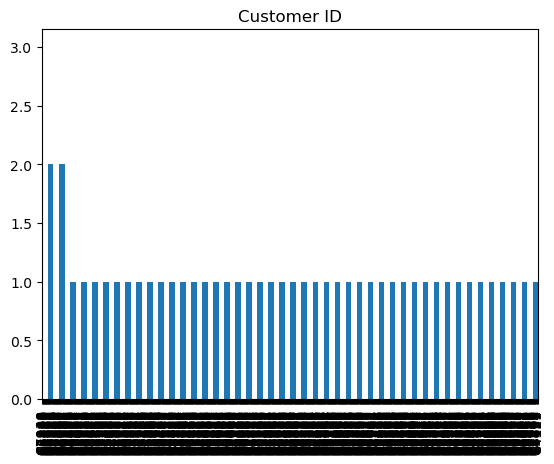

R2317    6
R2804    5
R2726    5
R2523    5
R2016    5
        ..
R2141    1
R2428    1
R2576    1
R2388    1
R2742    1
Name: Restaurant ID, Length: 621, dtype: int64


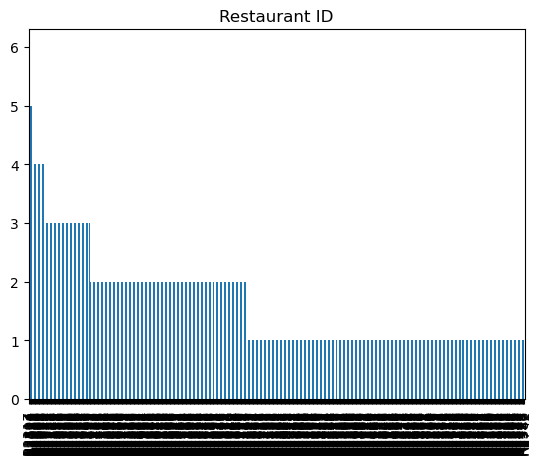

Cash on Delivery    357
Credit Card         337
Digital Wallet      306
Name: Payment Method, dtype: int64


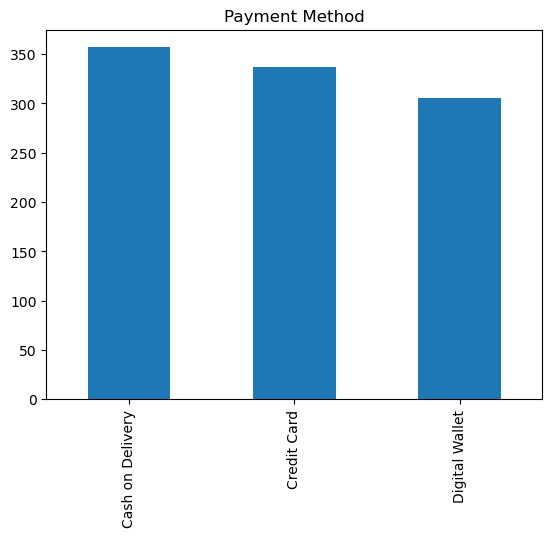

10%             233
50 off Promo    201
15% New User    198
None            185
5% on App       183
Name: Discounts and Offers, dtype: int64


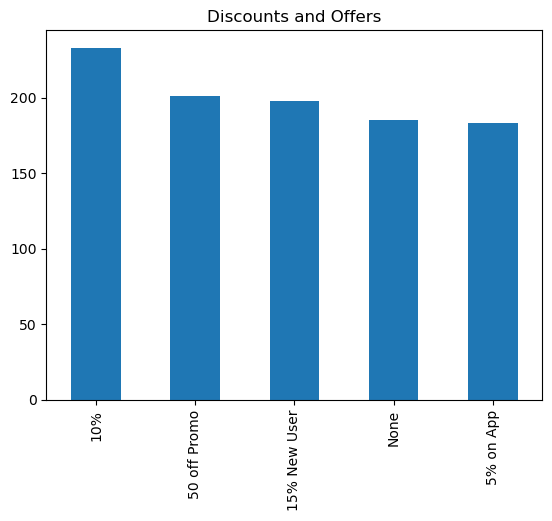

2024-01-13    38
2024-01-20    34
2024-01-15    34
2024-01-18    33
2024-01-23    33
2024-02-01    32
2024-01-16    32
2024-01-27    31
2024-01-30    31
2024-02-07    31
2024-01-31    30
2024-01-12    30
2024-02-03    29
2024-01-01    28
2024-01-03    27
2024-02-02    27
2024-01-21    27
2024-01-09    26
2024-02-06    26
2024-01-25    26
2024-02-05    26
2024-01-26    25
2024-01-28    25
2024-01-06    25
2024-01-19    25
2024-01-07    24
2024-02-04    24
2024-01-02    24
2024-01-08    23
2024-01-14    22
2024-01-11    22
2024-01-24    21
2024-01-04    20
2024-01-05    19
2024-01-17    18
2024-01-29    18
2024-01-22    17
2024-01-10    17
Name: order_date, dtype: int64


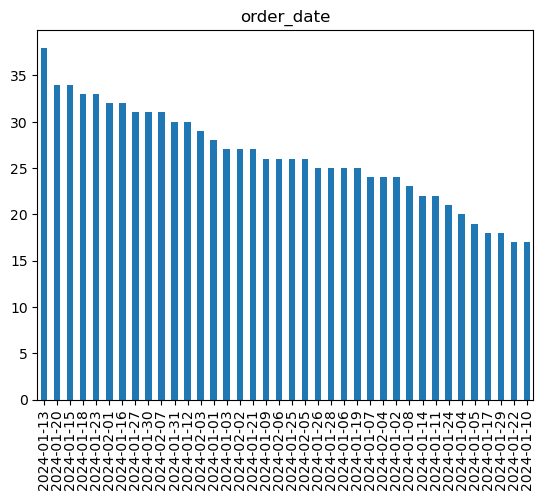

Tuesday      172
Saturday     157
Monday       146
Wednesday    144
Thursday     133
Friday       126
Sunday       122
Name: order_day, dtype: int64


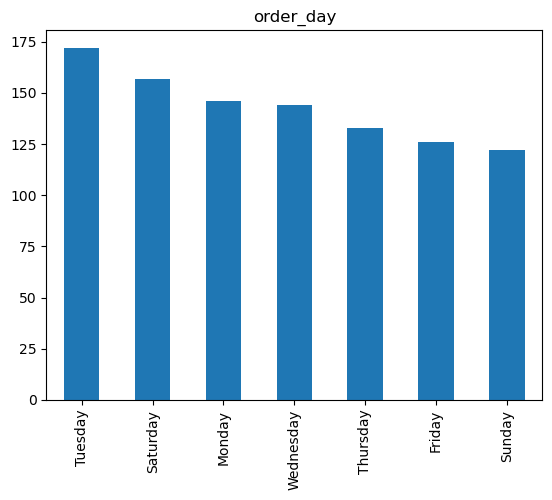

Morning      315
Afternoon    188
Evening      173
Name: order_time, dtype: int64


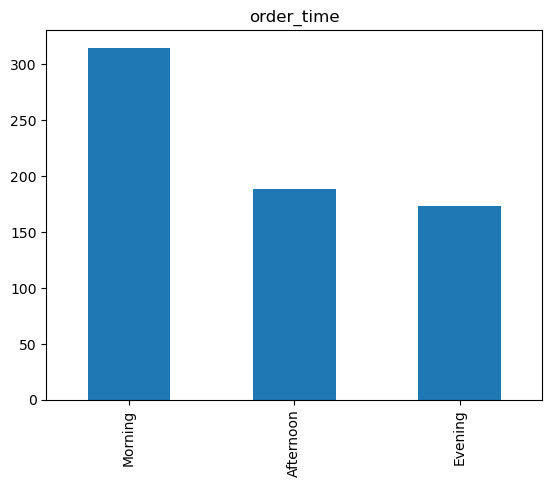

In [93]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(df[col].value_counts())
    df[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


C:\Users\ASUS ROG\AppData\Local\Temp\ipykernel_16068\2291632263.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


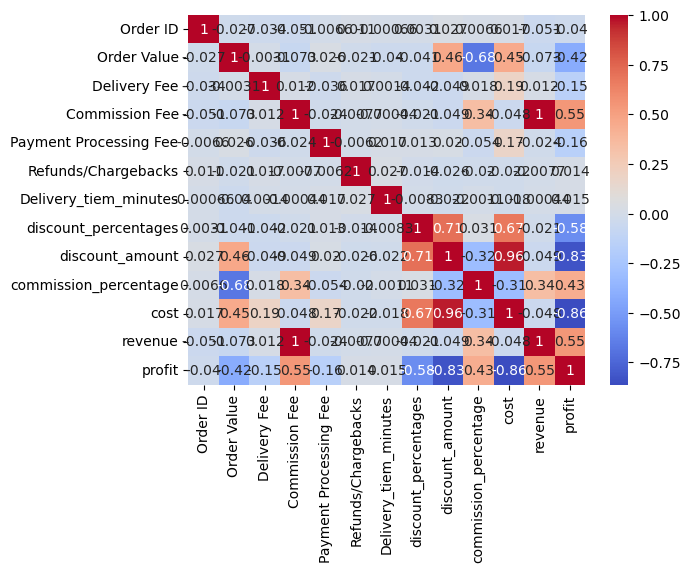

In [94]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

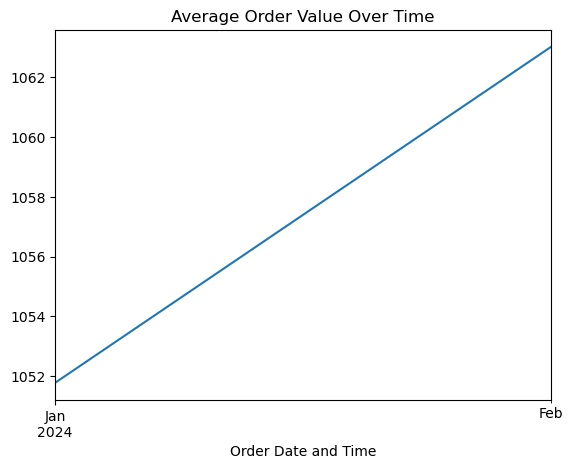

In [95]:

df.set_index('Order Date and Time')['Order Value'].resample('M').mean().plot()
plt.title('Average Order Value Over Time')
plt.show()


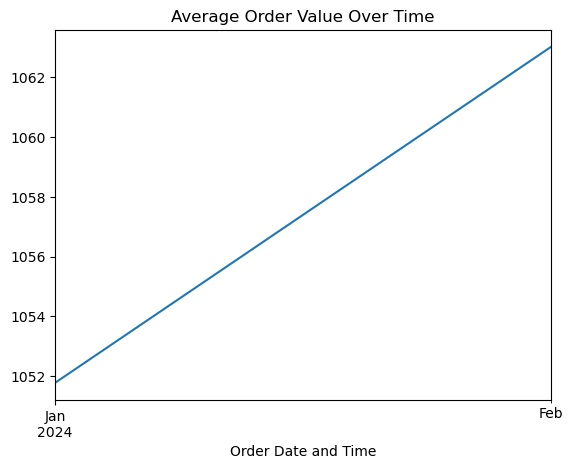

In [96]:
df.set_index('Order Date and Time')['Order Value'].resample('M').mean().plot()
plt.title('Average Order Value Over Time')
plt.show()

In [97]:
X = df.drop(columns=['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time', 'Delivery Date and Time', 'order_date', 'order_day', 'order_time', 'profit'])
y = df['profit']  

In [98]:
X = pd.get_dummies(X)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [101]:
y_pred = model.predict(X_test)

In [102]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

Mean Squared Error: 2.856458054537404e-26
R-squared Score: 1.0
